# **Credit Card Fraud Detection**

# Problem Statement:

Credit card fraud is a major financial crime that causes billions of dollars in losses every year. Detecting fraudulent transactions in real-time is crucial for banks and financial institutions to prevent unauthorized activities and safeguard user accounts.

# Objective:

The goal of this project is to build a machine learning model that can accurately classify whether a given credit card transaction is fraudulent or genuine. The key challenges include handling imbalanced data and minimizing false negatives (frauds incorrectly classified as non-frauds).



# Dataset Overview:

**Source:** [Kaggle - Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)

**Features:** Time, Amount, PCA-transformed features: V1 to V28

**Target Variable:**

**Class** = 0 → Legitimate

**Class** = 1 → Fraudulent

**Class Imbalance:**

Fraudulent transactions make up only 0.17% of the dataset, making this a highly imbalanced binary classification problem.

# Tools and Technologies

**Language:** Python

**Data Handling & Preprocessing:** Pandas, NumPy, Scikit-learn

**Visualization:** Matplotlib, Seaborn

**Modeling:** PyTorch – for custom neural network models

**Notebook Environment:** kaggle, Jupyter Notebook, Google Colab, or any Python IDE

# Load and Explore the Dataset


**Step 1: Import necessary libraries**

In [3]:
import torch
import torch as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load the dataset**

In [4]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset/creditcard_2023.csv')

**Step 3: View basic information**

In [5]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (568630, 31)

First 5 rows:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

**Meaning of this Output**
* The original credit card dataset contains sensitive customer and transaction data.
* To protect privacy, the creators used a method called **PCA (Principal Component Analysis)** to anonymize the features.
* PCA converts original features into new synthetic features (called principal components).
* These new features:
  1. Are labeled as V1, V2, ..., V28
  2. Contain most of the original variance
  3. Are uncorrelated and sorted by importance


| Column        | Description                                 |
| ------------- | ------------------------------------------- |
| `id`          | Unique transaction ID                       |
| `V1` to `V28` | PCA components (transformed features)       |
| `Amount`      | Actual transaction amount in dollars        |
| `Class`       | Target label → `0` for legit, `1` for fraud |

**Step 4: Data types and missing values**

In [6]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64


**Step 5: Statistical summary**

In [7]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                  id            V1            V2            V3             V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000   
mean   284314.500000 -5.118237e-17 -1.023647e-16  1.023647e-16       0.000000   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00       1.000001   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00      -4.951222   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01      -0.656020   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04      -0.073762   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01       0.707005   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01       3.201536   

                 V5            V6             V7             V8  \
count  5.686300e+05  5.686300e+05  568630.000000  568630.000000   
mean   2.559118e-17  2.559118e-17       0.000000       0.000000   
std    1.000001e+00  1.000001e+00       1.00000


| Statistic        | Meaning                                                        |
| ---------------- | -------------------------------------------------------------- |
| **count**        | 568,630 total transactions                                     |
| **mean**         | Average amount is **\$12,041.96**                              |
| **std**          | Standard deviation is high (**\$6,919.64**) → high variability |
| **min**          | Smallest transaction = **\$50.01**                             |
| **25%**          | 25% of transactions are ≤ **\$6,054.89**                       |
| **50% (median)** | Half of all transactions are ≤ **\$12,030.15**                 |
| **75%**          | 75% are ≤ **\$18,036.33**                                      |
| **max**          | Largest transaction = **\$24,039.93**                          |


So: Transaction values range from $50 → $24k+, centered around $12k.

**Step 6: Check class distribution (imbalanced data)**

In [8]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


**Step 7: Plot class distribution**

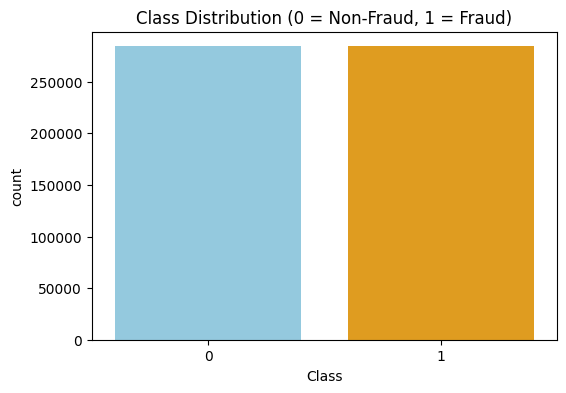

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette={0: 'skyblue', 1: 'orange'})
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

# Data Preprocessing
This step prepares our data for training by:
1. Scaling/normalizing the Amount column (PCA features are already scaled)
2. Splitting the data into training and testing sets
3. Handling class imbalance — not needed in our case because our dataset is already balanced

**Step 1: Import necessary tools**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Step 2: Separate features and labels**
We are dropping the class and ID column as they are useless features 

In [11]:
X = df.drop(columns=['Class', 'id'])  
y = df['Class']

**Step 3: Normalize the 'Amount' column**

No need to normalize the other features because they are already scaled

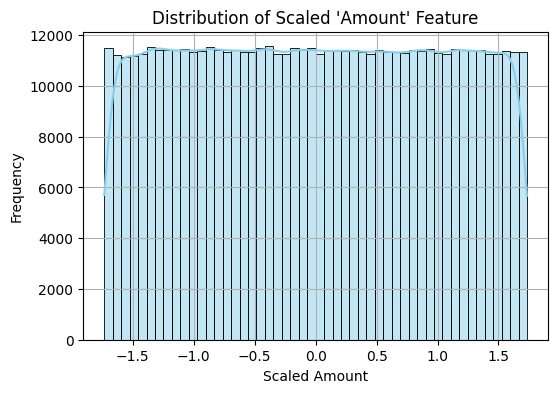

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # ignore the future warnings

scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

plt.figure(figsize=(6,4))
sns.histplot(X['Amount'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Scaled 'Amount' Feature")
plt.xlabel("Scaled Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Step 4: Splitting the data**

We are now splitting the dataset into train and test sets (80% train, 20% test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Training set shape: (454904, 29)
Test set shape: (113726, 29)
Training class distribution:
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Test class distribution:
 Class
1    0.5
0    0.5
Name: proportion, dtype: float64


# Preparing Data for PyTorch format

Now that the features are scaled, we need to convert the dataset into PyTorch format so it can be used for training a neural network.
1. Convert the features (X) and labels (y) into PyTorch tensors
2. Split the data into training and testing sets
3. Wrap them in DataLoader objects for batch training

**Step 1: Split into training and testing sets**

In [14]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y)

**Step 2: Convert to PyTorch tensors**

In [15]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

print("X Train", X_train_tensor)
print("Y Train", y_train_tensor)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("X Test", X_test_tensor)
print("Y Test", y_test_tensor)

X Train tensor([[-0.4490,  0.0226,  0.0380,  ...,  0.3886,  0.0680, -0.9713],
        [ 1.6689, -0.6388,  0.5442,  ..., -0.2891, -0.2415,  0.8927],
        [ 0.0327,  0.4063, -0.7239,  ...,  0.5270,  0.4262,  1.5988],
        ...,
        [-1.3312,  1.2202, -1.5368,  ..., -0.3843, -0.4541, -0.8593],
        [-2.5977,  3.2931, -2.4835,  ...,  1.5271,  0.7861, -0.6385],
        [-0.5765, -0.1727,  0.9279,  ..., -2.2060,  0.8485, -0.3405]])
Y Train tensor([0, 0, 1,  ..., 1, 1, 1])
X Test tensor([[ 0.7015, -0.0628,  0.4057,  ..., -0.2585, -0.0258, -1.4430],
        [-0.0178, -0.7875, -0.1760,  ..., -0.2076,  0.2241, -1.3122],
        [-0.4609,  0.1620,  1.2391,  ..., -0.4008,  0.6035,  0.7034],
        ...,
        [-2.1245,  2.1777, -1.9255,  ..., -2.9852, -2.2446, -0.4941],
        [ 0.9033, -0.0744,  0.0161,  ..., -0.1248,  0.1801,  0.0668],
        [-1.8593,  1.7088, -1.7837,  ..., -1.1255, -1.4246,  0.5272]])
Y Test tensor([1, 1, 0,  ..., 1, 1, 1])


**Step 3: Wrap into TensorDataset and DataLoader**

In [16]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Build the Model

Let's build a fully connected neural network (MLP) that can learn from the 29 input features and classify transactions as fraud (1) or not fraud (0).

| Layer                      | Purpose                                                                                                           |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Input Layer (29 → 64)**  | Takes in 29 features (`V1` to `V28` + `Amount`) and expands to 64 neurons for learning more complex combinations. |
| **ReLU Activation**        | Adds non-linearity (so model can learn patterns).                                                                 |
| **Hidden Layer (64 → 32)** | Reduces dimensionality to 32 while retaining learned patterns.                                                    |
| **ReLU Activation**        | Again, non-linearity helps with pattern recognition.                                                              |
| **Dropout (optional)**     | Randomly disables 30% neurons to prevent overfitting.                                                                 |
| **Output Layer (32 → 2)**  | Outputs a prediction for each class (fraud / not fraud).                                                          |
| **Softmax / LogSoftmax**   | Converts raw scores into probabilities (used with loss function).                                                 |


In [21]:
import torch
import torch.nn as nn

class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(29, 64),       
            nn.ReLU(),
            nn.Linear(64, 32),       
            nn.ReLU(),
            nn.Dropout(0.3),        
            nn.Linear(32, 2)         
        )

    def forward(self, x):
        return self.model(x)

In [23]:
model = FraudDetectionNN()
print(model)

FraudDetectionNN(
  (model): Sequential(
    (0): Linear(in_features=29, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.3, inplace=False)
    (5): Linear(in_features=32, out_features=2, bias=True)
  )
)


# Define Loss Function, Optimizer
* We'll use CrossEntropyLoss because it's suitable for classification tasks with 2 or more classes.
* Adam is efficient for deep learning tasks and adapts learning rates during training.

In [24]:
import torch.nn as nn
import torch.optim as optim

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to device
model = FraudDetectionNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Using device: cpu


# Train the Model

We pass the data in batches, compute loss, update weights, and track accuracy.

In [35]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Training Accuracy: {accuracy:.2f}%")

Epoch 1/10, Loss: 18.2461, Training Accuracy: 99.94%
Epoch 2/10, Loss: 17.3618, Training Accuracy: 99.94%
Epoch 3/10, Loss: 16.5751, Training Accuracy: 99.95%
Epoch 4/10, Loss: 16.2954, Training Accuracy: 99.94%
Epoch 5/10, Loss: 15.9717, Training Accuracy: 99.95%
Epoch 6/10, Loss: 15.0278, Training Accuracy: 99.95%
Epoch 7/10, Loss: 15.4970, Training Accuracy: 99.94%
Epoch 8/10, Loss: 14.5659, Training Accuracy: 99.95%
Epoch 9/10, Loss: 14.2606, Training Accuracy: 99.96%
Epoch 10/10, Loss: 14.3873, Training Accuracy: 99.96%


# Evaluation of Model
After training, we use unseen test data to evaluate how well our model generalizes. Key metrics:
* **Accuracy:** % of correct predictions.
* **Precision:** Of predicted frauds, how many were actually frauds?
* **Recall:** Of actual frauds, how many did we catch?
* **F1-score:** Balance between precision and recall.
* **Confusion Matrix:** Shows TP, TN, FP, FN — important when data is imbalanced.




Formatted Classification Report:


,precision,recall,f1-score,support
0,1.0000,0.9992,0.9996,56863.0000
1,0.9992,1.0000,0.9996,56863.0000
accuracy,0.9996,0.9996,0.9996,0.9996
macro avg,0.9996,0.9996,0.9996,113726.0000
weighted avg,0.9996,0.9996,0.9996,113726.0000


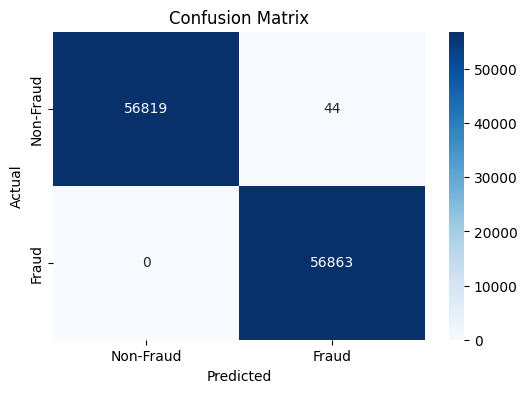

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.cpu().numpy())

# Get the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame format and rounding off to decimals
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(4)
print("\nFormatted Classification Report:")
display(report_df)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.4f}%")

Test Accuracy: 99.9613%
